In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [25]:
def read_file_path(path):
    file_name,file_extension=os.path.splitext(path)
    if file_extension=='.csv':
        df=pd.read_csv(path)
        print('CSV file uploaded successfully.')
    elif file_extension=='.xlsx':
        df=pd.read_excel(path)
        print('excel file uploaded successfully')
    else:
        raise ValueError("Unsupported file format. Please provide a CSV or XLS/XLSX file.")
    return df
data=read_file_path('/content/healthcare-dataset-stroke-data.csv')
data

CSV file uploaded successfully.


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [26]:
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [11]:
data.shape

(5110, 12)

In [27]:
def column_types(data):
    data_types = {}

    first_row = data.iloc[0]

    for column_name, value in first_row.iteritems():
        data_type = type(value).__name__
        data_types[column_name] = data_type

    return data_types

column_types(data)

{'id': 'int64',
 'gender': 'str',
 'age': 'float64',
 'hypertension': 'int64',
 'heart_disease': 'int64',
 'ever_married': 'str',
 'work_type': 'str',
 'Residence_type': 'str',
 'avg_glucose_level': 'float64',
 'bmi': 'float64',
 'smoking_status': 'str',
 'stroke': 'int64'}

In [28]:
def check_null(data):
    missing_values={}
    total_rows=data.shape[0]       # 5110 rows

    for column in data.columns:
        missing_count = total_rows - data[column].count()
        missing_values[column] = missing_count

    return missing_values
check_null(data)

{'id': 0,
 'gender': 0,
 'age': 0,
 'hypertension': 0,
 'heart_disease': 0,
 'ever_married': 0,
 'work_type': 0,
 'Residence_type': 0,
 'avg_glucose_level': 0,
 'bmi': 201,
 'smoking_status': 0,
 'stroke': 0}

In [29]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [30]:
def delete_feature(data):
    deleted_variable=[]

    while True:
        variable_name=input('Enter the variable you want to delete : ').strip()
        if not variable_name:
            break
        if variable_name in data.columns:
            deleted_variable.append(variable_name)
        else:
            print(f'{variable_name} not found ')

        continue_deletion = input('Do you want to continue deleting more variables? (yes/no): ').strip().lower()
        if continue_deletion != 'yes':
            break
    if not deleted_variable:
        print('you have not enter variables to delete')
    else:
        print(f"The deleted features are : {', '.join(deleted_variable)}.")

    data.drop(deleted_variable,axis=1,inplace=True)
    return data
delete_feature(data)

Enter the variable you want to delete : id 
Do you want to continue deleting more variables? (yes/no): no
The deleted features are : id.


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [41]:
from sklearn.impute import SimpleImputer

In [33]:
def impute(data):
    mean_impute=SimpleImputer(strategy='mean',missing_values=np.nan)
    median_impute=SimpleImputer(strategy='median',missing_values=np.nan)
    mode_impute=SimpleImputer(strategy='most_frequent',missing_values=np.nan)

    while True:
        variable_name=input('Enter the variable you want to impute : ').strip()
        if not variable_name:
            break
        if variable_name not in data.columns:
            print(f'Variable "{variable_name}" not found.')
            continue

        technique=input('which technique do you want to impute ? (mean/median/most_frequent) ').strip().lower()

        if technique not in ['mean', 'median', 'most_frequent']:
            print('Invalid imputation technique. Please choose from mean, median, or most_frequent.')
            continue

        imputer = SimpleImputer(strategy=technique, missing_values=np.nan)
        imputed_values = imputer.fit_transform(data[[variable_name]])

        data[variable_name] = imputed_values
        print(f'Imputed missing values in "{variable_name}" using {technique} imputation.')

        continue_imputing = input('Do you want to continue imputing for other variables? (yes/no): ').strip().lower()
        if continue_imputing != 'yes':
            break

    return data
impute(data)

Enter the variable you want to impute : bmi
which technique do you want to impute ? (mean/median/most_frequent) median
Imputed missing values in "bmi" using median imputation.
Do you want to continue imputing for other variables? (yes/no): no


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [40]:
from sklearn.preprocessing import LabelEncoder

In [34]:
def label_encoder(data):
    while True:
      variable_name=input('Enter the variable you want to encode : ').strip()
      if not variable_name:
        break
      if variable_name not in data.columns:
        print(f'Variable "{variable_name}" not found.')
        continue

      encode=LabelEncoder()
      encoded_value=encode.fit_transform(data[variable_name])

      data[variable_name]=encoded_value

      continue_imputing = input('Do you want to continue imputing for other variables? (yes/no): ').strip().lower()
      if continue_imputing != 'yes':
            break

    return data
label_encoder(data)

Enter the variable you want to encode : gender
Do you want to continue imputing for other variables? (yes/no): no


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,0,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,1,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,0,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,0,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,0,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,0,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,1,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [43]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,Normalizer

In [45]:
def scaling(data):
    while True:
        variable_name = input('Enter the variable you want to scale ').strip()
        if not variable_name:
            break

        if variable_name not in data.columns:
            print(f'Variable "{variable_name}" not found.')
            continue

        technique = input('Which technique do you want to use for scaling? (Min-Max Scaling / Standardization /Normalization): ').strip().lower()

        if technique not in ['min-max scaling', 'standardization' , 'normalization']:
            print('Invalid scaling technique. Please choose from Min-Max Scaling or Standardization or normalization.')
            continue

        if technique == 'standardization':
            scaler = StandardScaler()
        elif technique=='normalization':
            scaler=Normalizer()
        else:
            scaler = MinMaxScaler()

        data[variable_name] = scaler.fit_transform(data[[variable_name]])

        print(f'Scaled "{variable_name}" using {technique}.')

        continue_scaling = input('Do you want to continue scaling for other variables? (yes/no): ').strip().lower()
        if continue_scaling != 'yes':
            break

    return data

scaling(data)


Enter the variable you want to scale Normalization
Variable "Normalization" not found.
Enter the variable you want to scale avg_glucose_level
Which technique do you want to use for scaling? (Min-Max Scaling / Standardization /Normalization): Standardization
Scaled "avg_glucose_level" using standardization.
Do you want to continue scaling for other variables? (yes/no): no


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,Yes,Private,Urban,0.01399,36.6,formerly smoked,1
1,0,61.0,0,0,Yes,Self-employed,Rural,0.01399,28.1,never smoked,1
2,1,80.0,0,1,Yes,Private,Rural,0.01399,32.5,never smoked,1
3,0,49.0,0,0,Yes,Private,Urban,0.01399,34.4,smokes,1
4,0,79.0,1,0,Yes,Self-employed,Rural,0.01399,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,Yes,Private,Urban,0.01399,28.1,never smoked,0
5106,0,81.0,0,0,Yes,Self-employed,Urban,0.01399,40.0,never smoked,0
5107,0,35.0,0,0,Yes,Self-employed,Rural,0.01399,30.6,never smoked,0
5108,1,51.0,0,0,Yes,Private,Rural,0.01399,25.6,formerly smoked,0


# to get which column to predict


In [63]:
def select_target_column(data):
  while True:
    target_column=input('Enter column name you want to predict : ')
    if target_column in data.columns:
      return target_column
    else:
      print(f'{target_column} not found in the dataset, Try again ')
target_column=select_target_column(data)
target_column

Enter column name you want to predict : stroke


'stroke'

In [47]:
data.describe()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5.110000e+03,5110.000000,5110.000000
mean,0.414286,43.226614,0.097456,0.054012,2.779599e-15,28.862035,0.048728
std,0.493044,22.612647,0.296607,0.226063,1.000098e+00,7.699562,0.215320
min,0.000000,0.080000,0.000000,0.000000,-7.147727e+01,10.300000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,1.399046e-02,23.800000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.399046e-02,28.100000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.399046e-02,32.800000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.399046e-02,97.600000,1.000000


In [48]:
data.describe(include=["object"])

,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110
unique,2,5,2,4
top,Yes,Private,Urban,never smoked
freq,3353,2925,2596,1892


# Plot Histogram

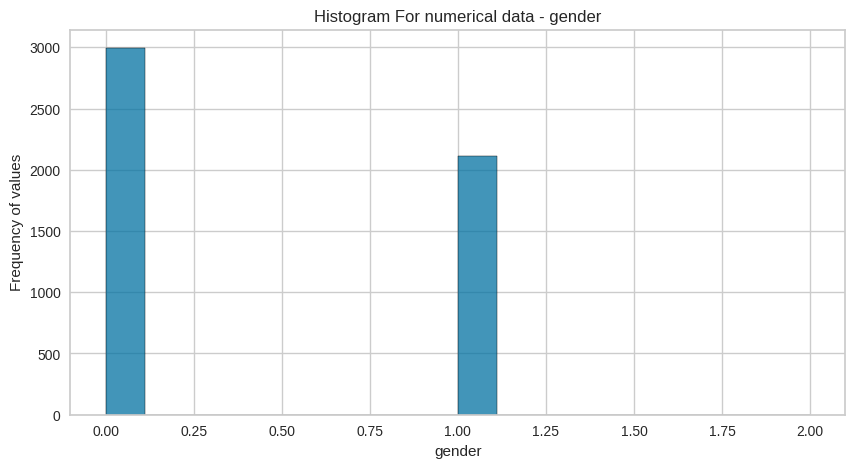

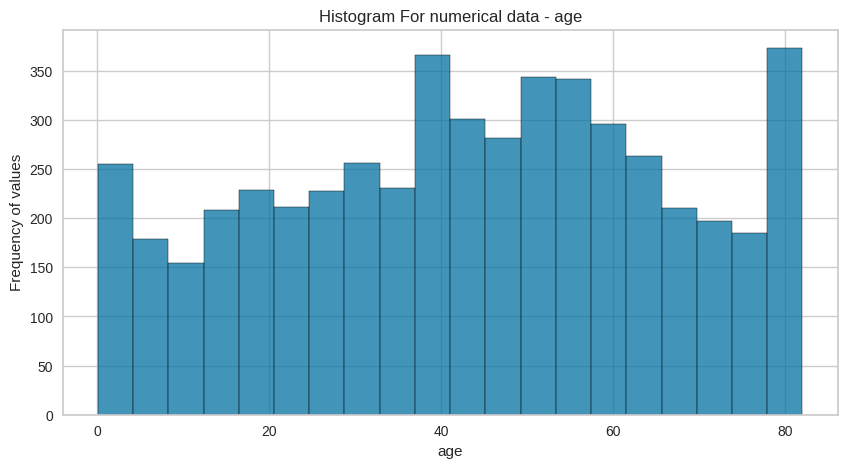

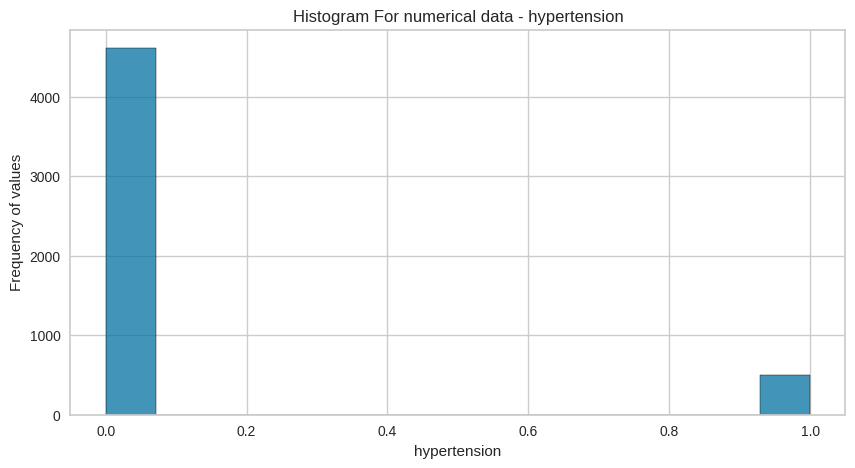

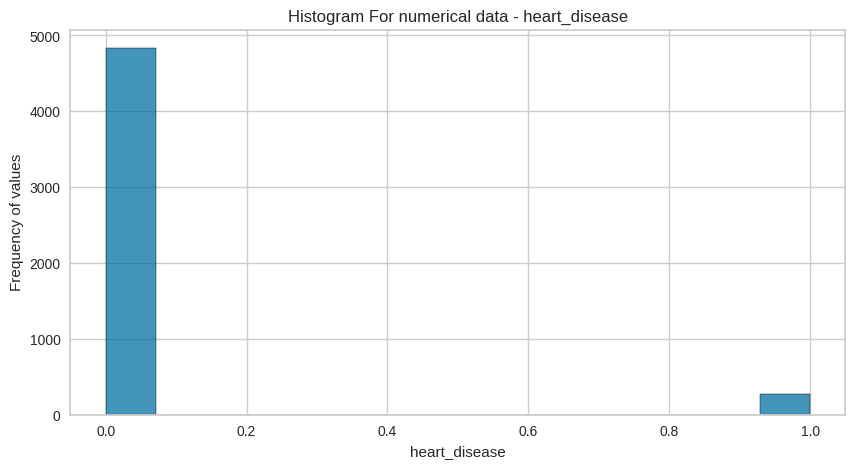

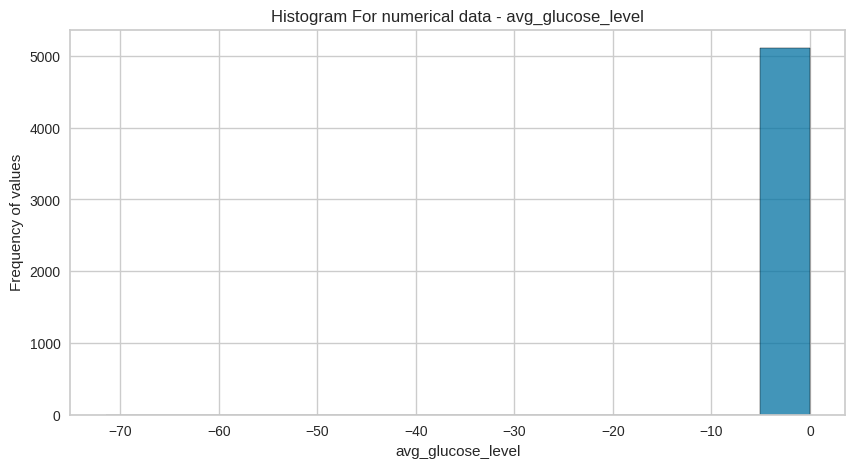

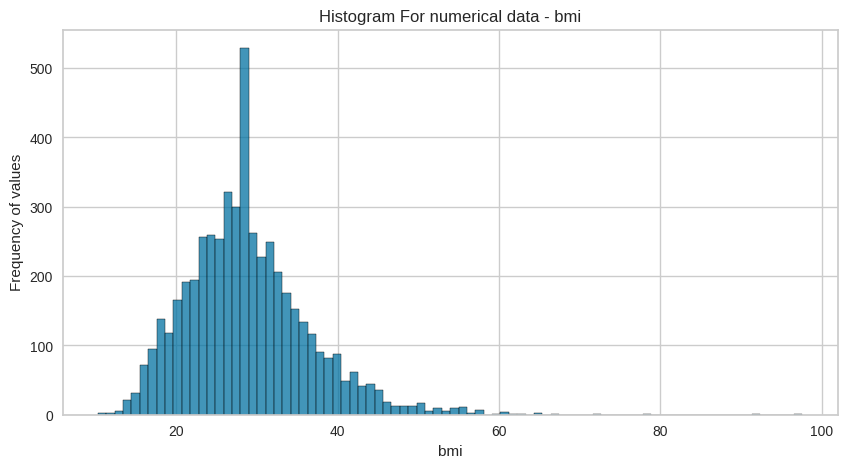

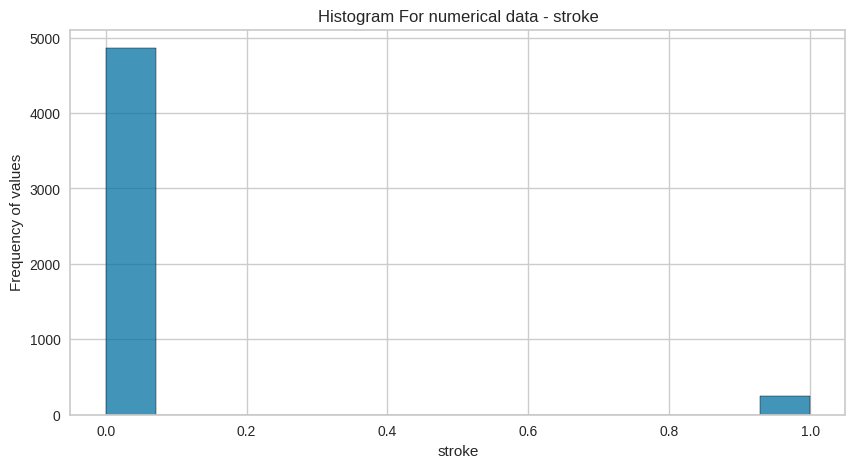

In [68]:
def plot_histograms(data):
    numeric_columns = data.select_dtypes(include=['number']).columns
    for column in numeric_columns:
        plt.figure(figsize=(10, 5))
        sns.histplot(data=data, x=column)
        plt.title(f"Histogram For numerical data - {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency of values")
        plt.show()
plot_histograms(data)

# Plot Box-plots

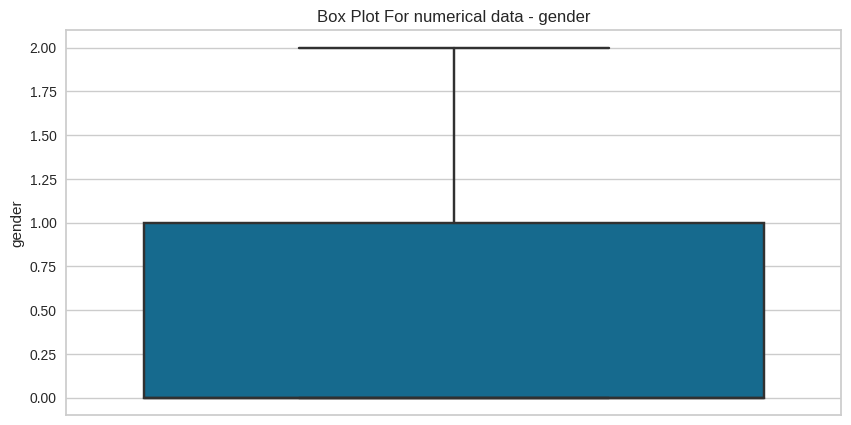

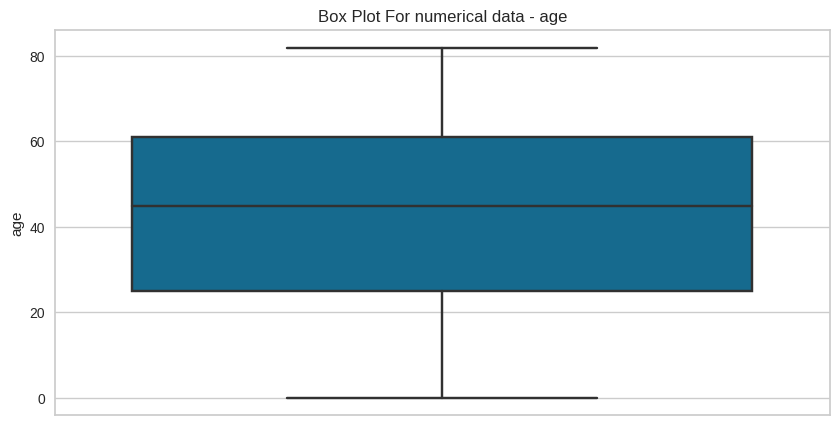

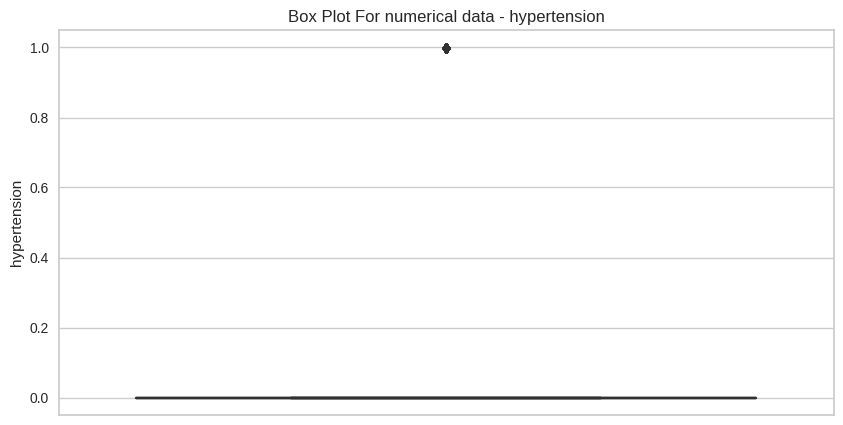

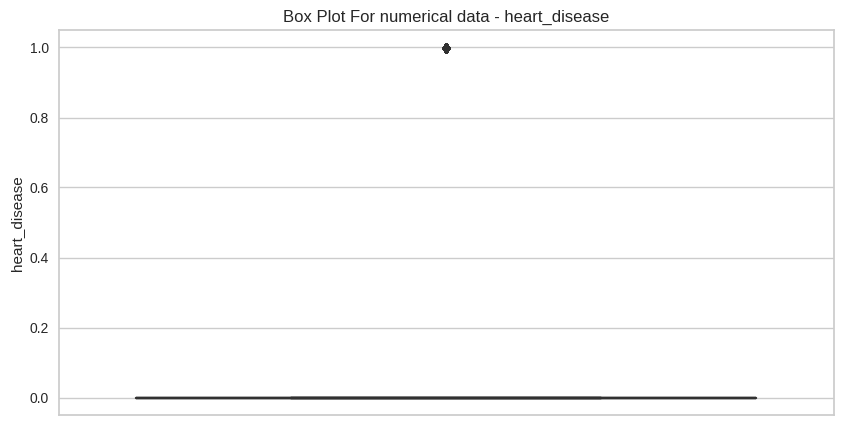

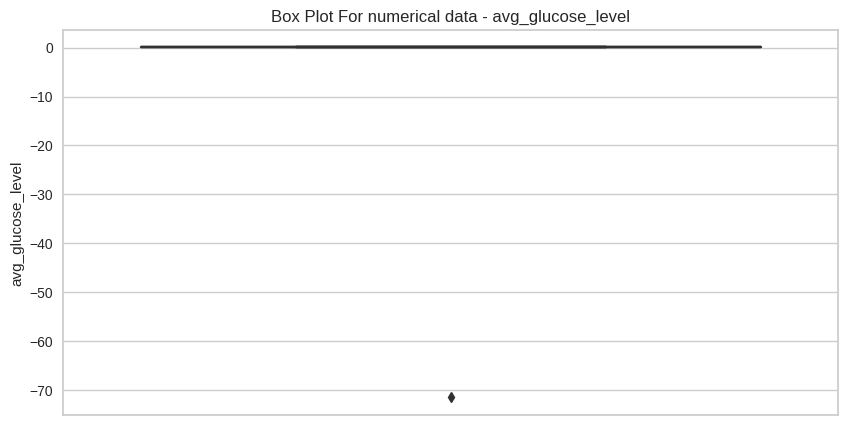

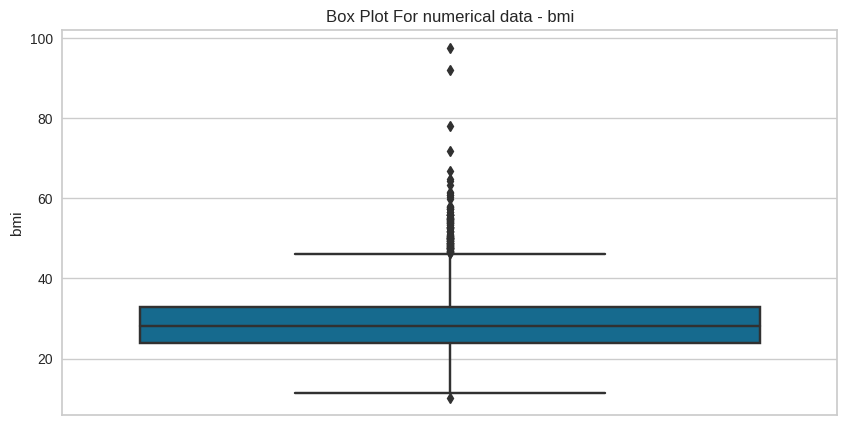

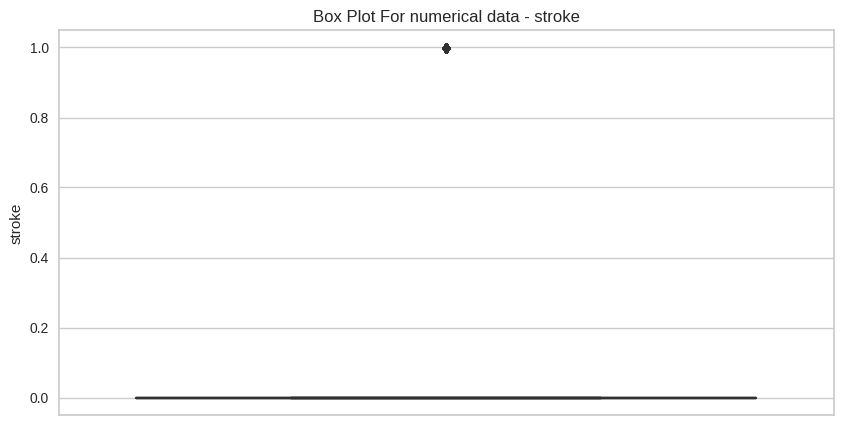

In [69]:
def plot_box_plots(data):
    numeric_columns = data.select_dtypes(include=['number']).columns
    for column in numeric_columns:
        plt.figure(figsize=(10, 5))
        sns.boxplot(data=data, y=column)
        plt.title(f"Box Plot For numerical data - {column}")
        plt.ylabel(column)
        plt.show()
plot_box_plots(data)

# Plot Scatter plot

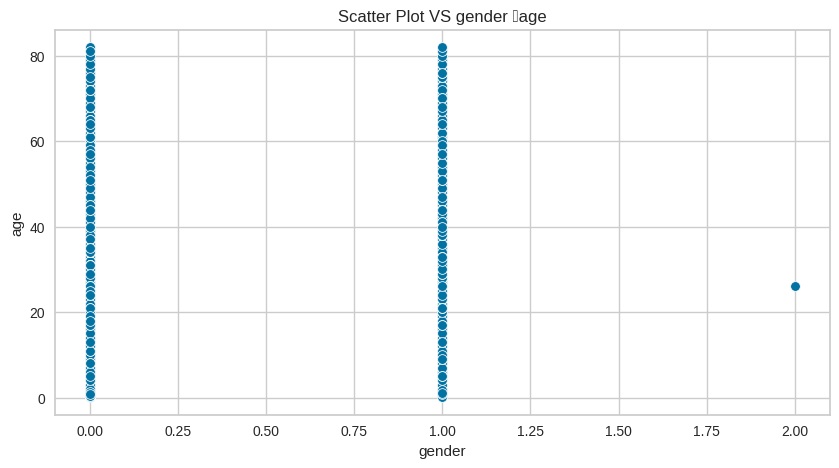

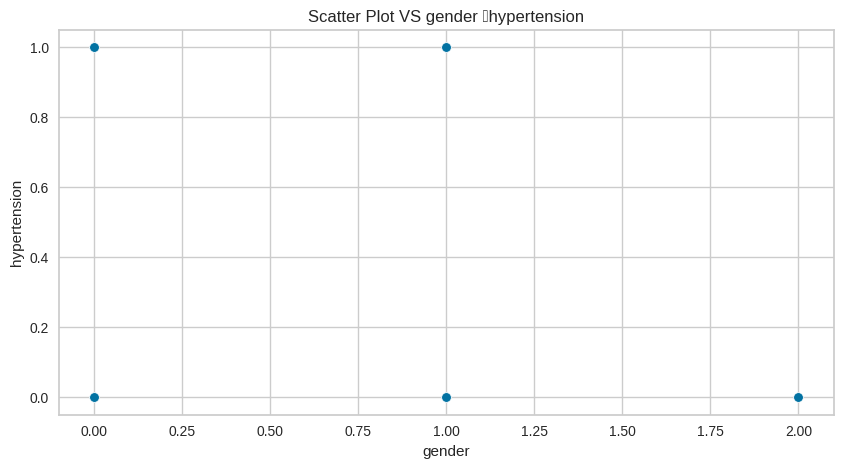

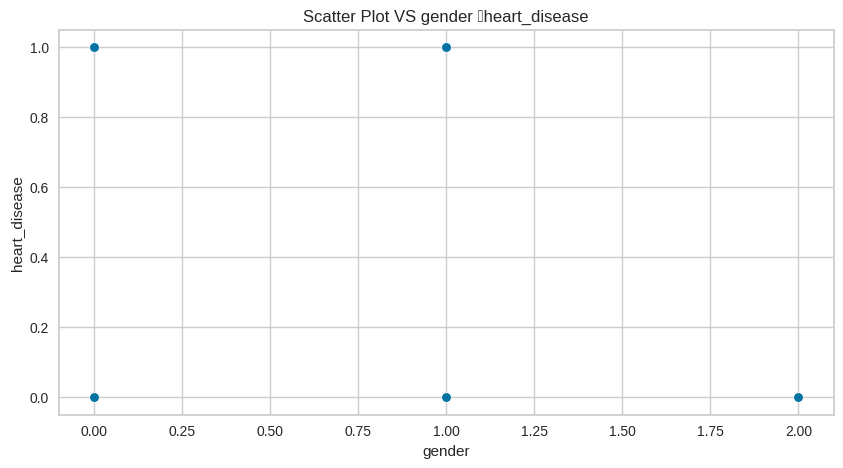

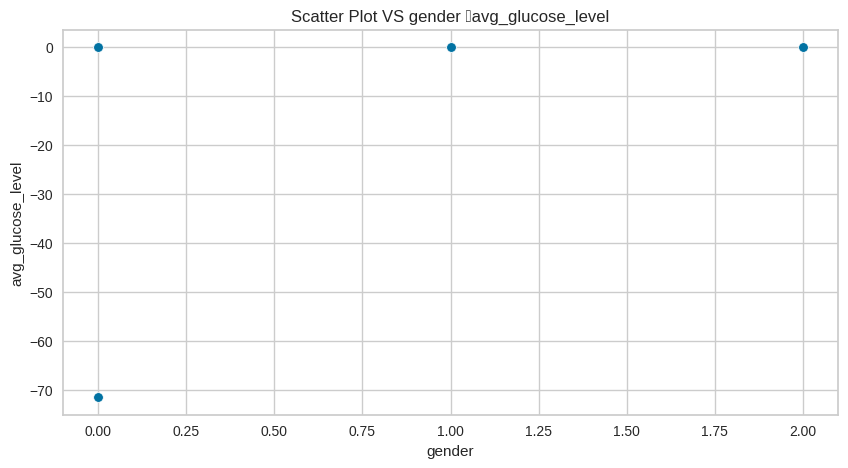

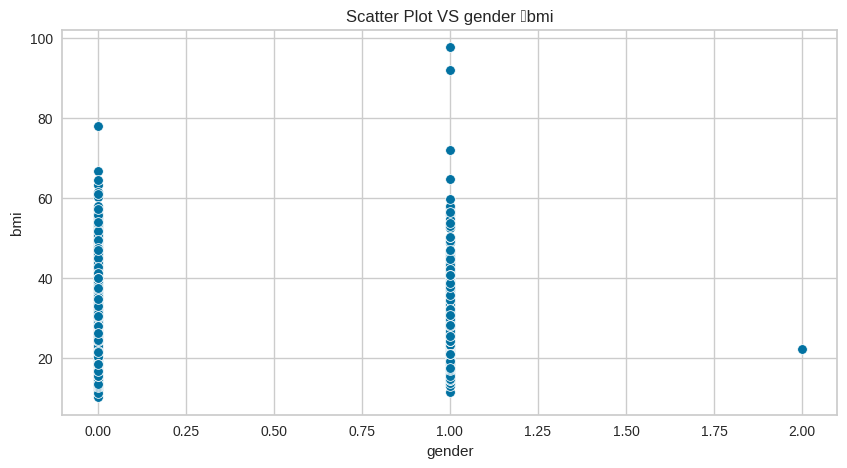

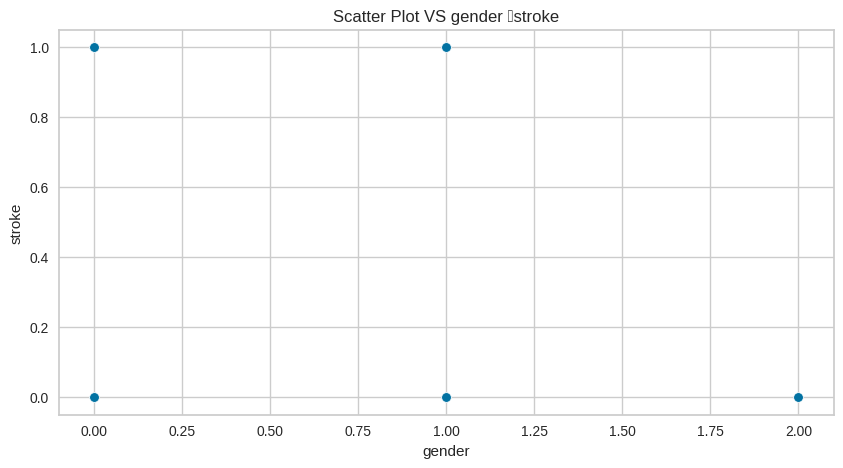

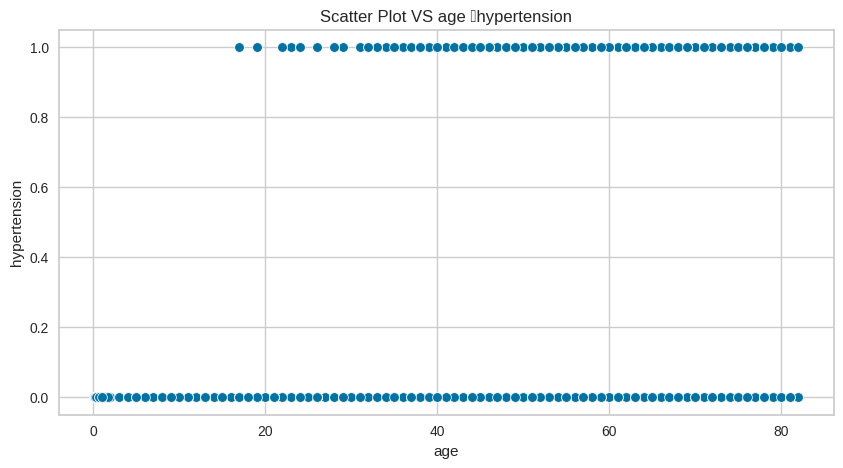

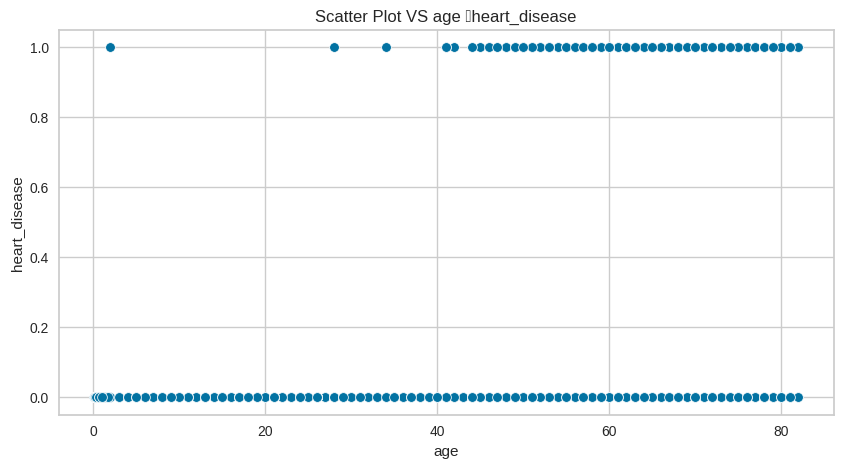

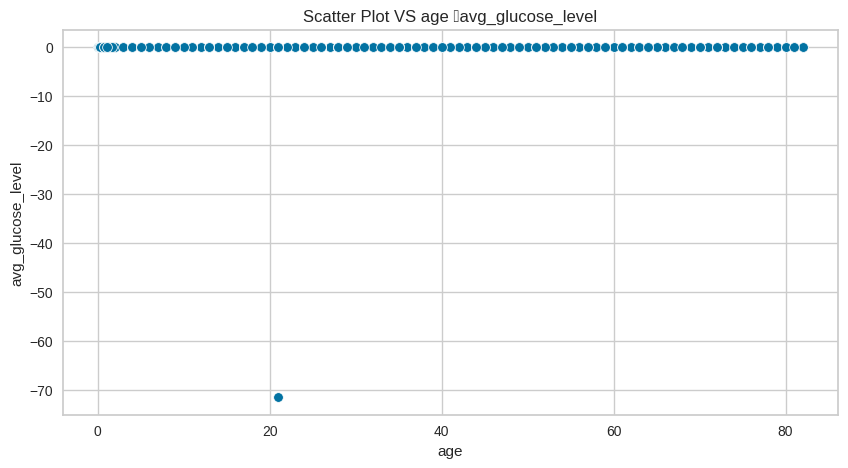

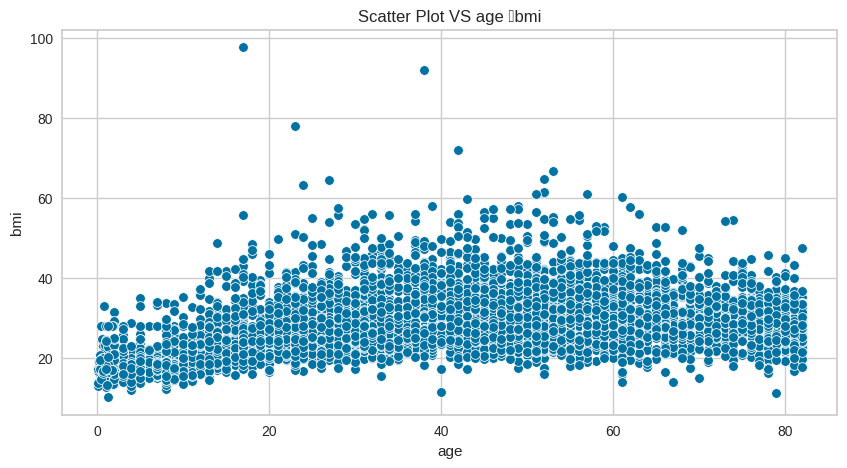

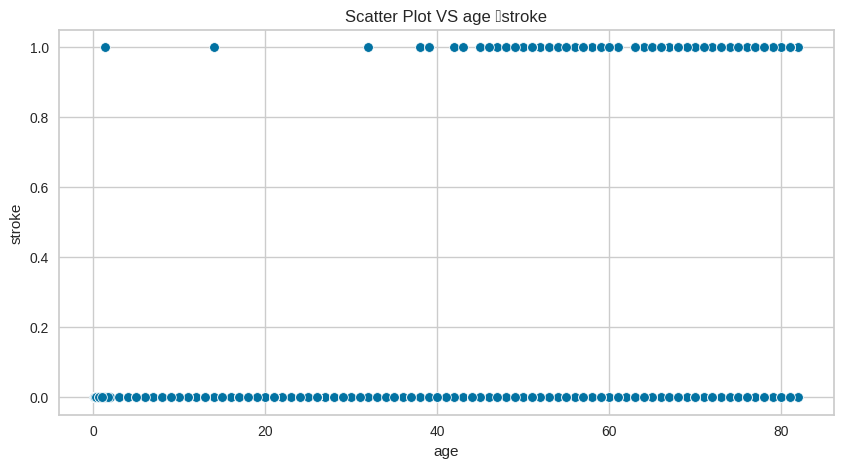

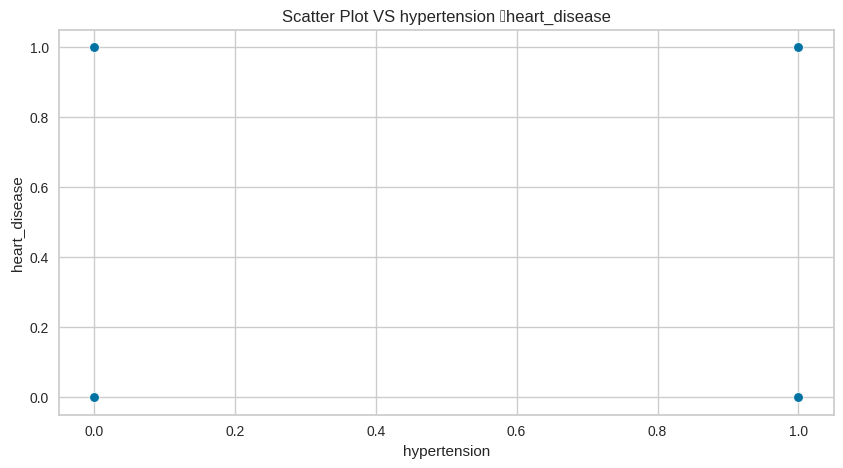

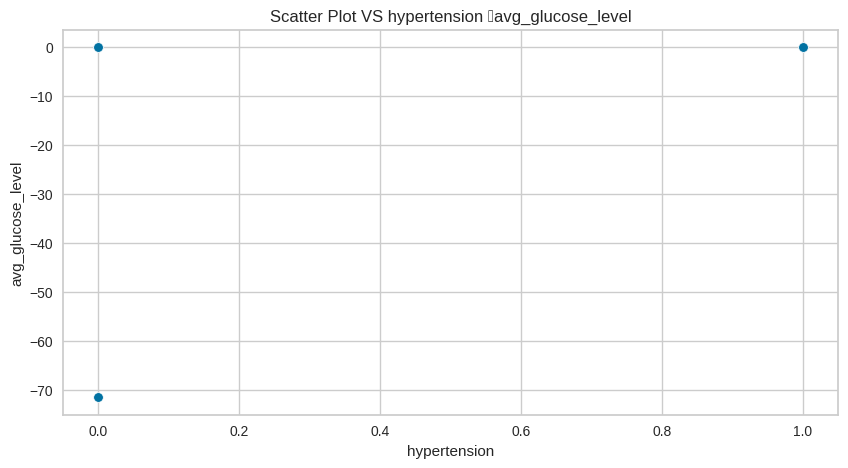

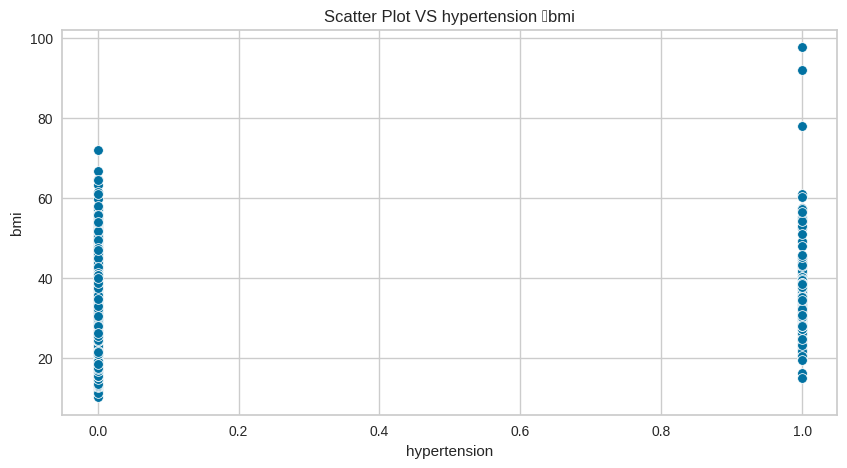

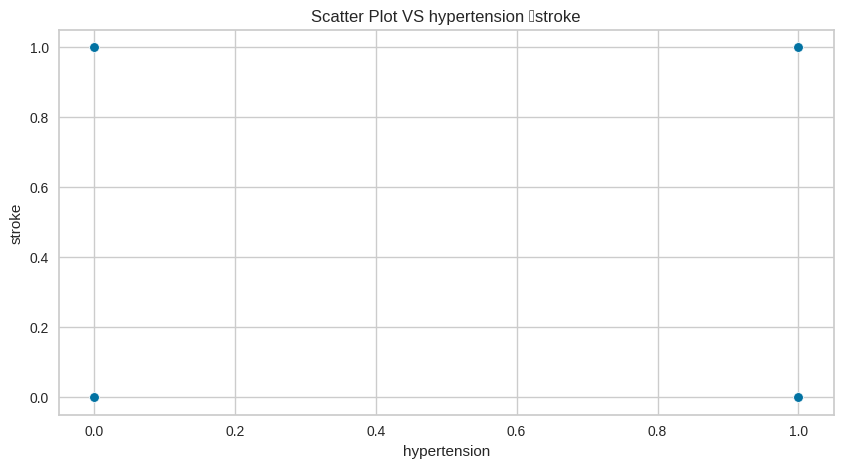

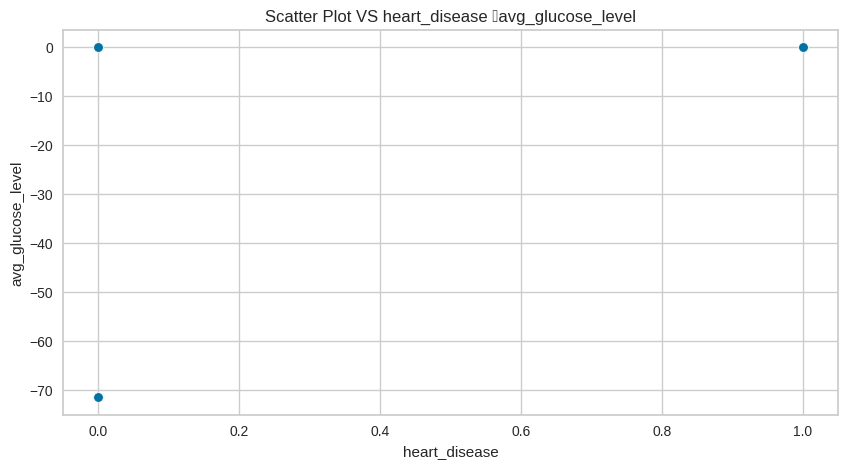

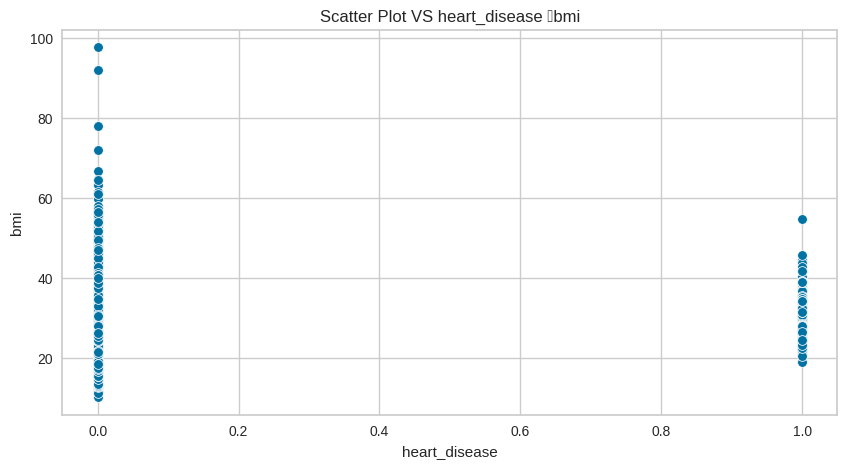

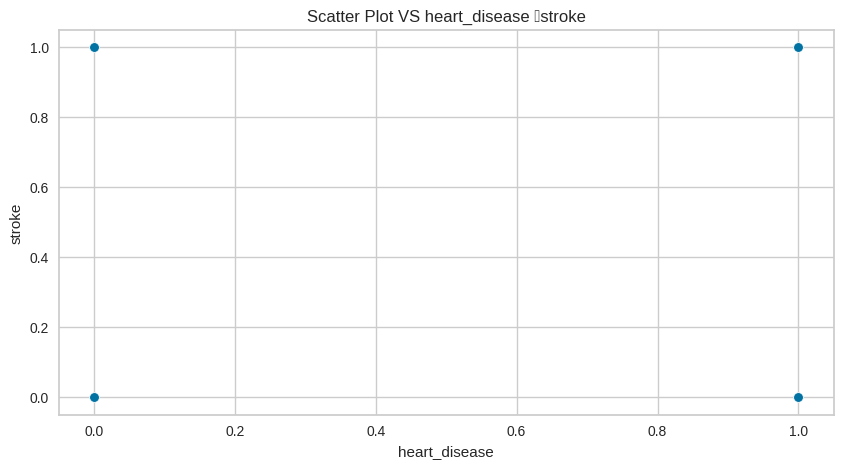

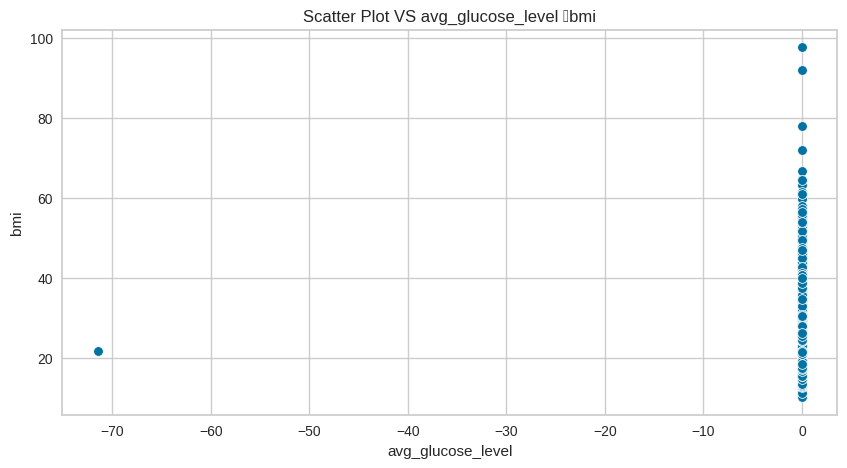

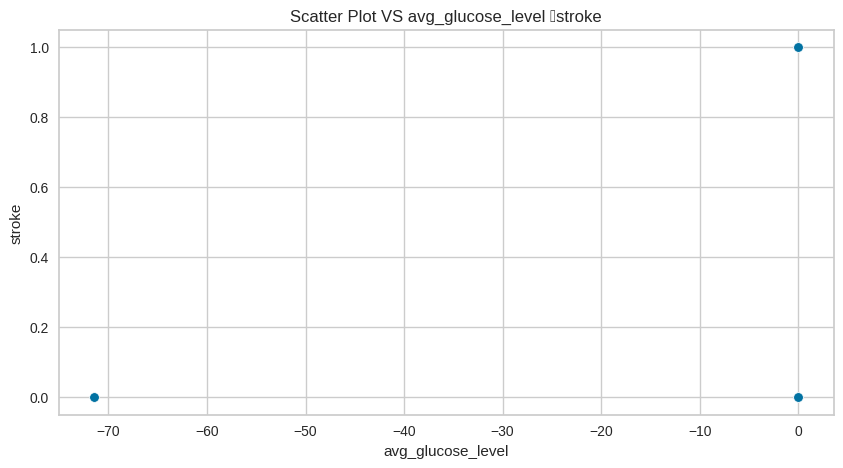

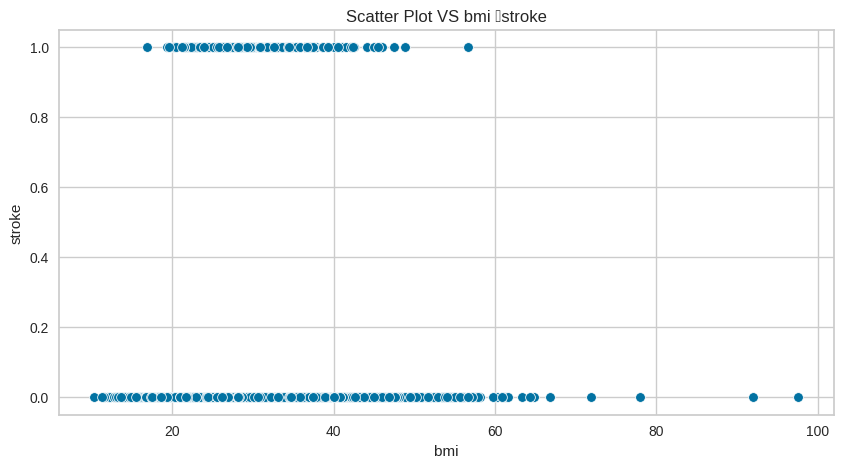

In [70]:
def plot_scatter_plots(data):
    numeric_columns = data.select_dtypes(include=['number']).columns
    if len(numeric_columns) >= 2:
        for i in range(len(numeric_columns)):
            for j in range(i + 1, len(numeric_columns)):
                plt.figure(figsize=(10, 5))
                sns.scatterplot(data=data, x=numeric_columns[i], y=numeric_columns[j])
                plt.title(f"Scatter Plot VS {numeric_columns[i]} و{numeric_columns[j]}")
                plt.xlabel(numeric_columns[i])
                plt.ylabel(numeric_columns[j])
                plt.show()
plot_scatter_plots(data)

# visualize the relationships between pairs of variables

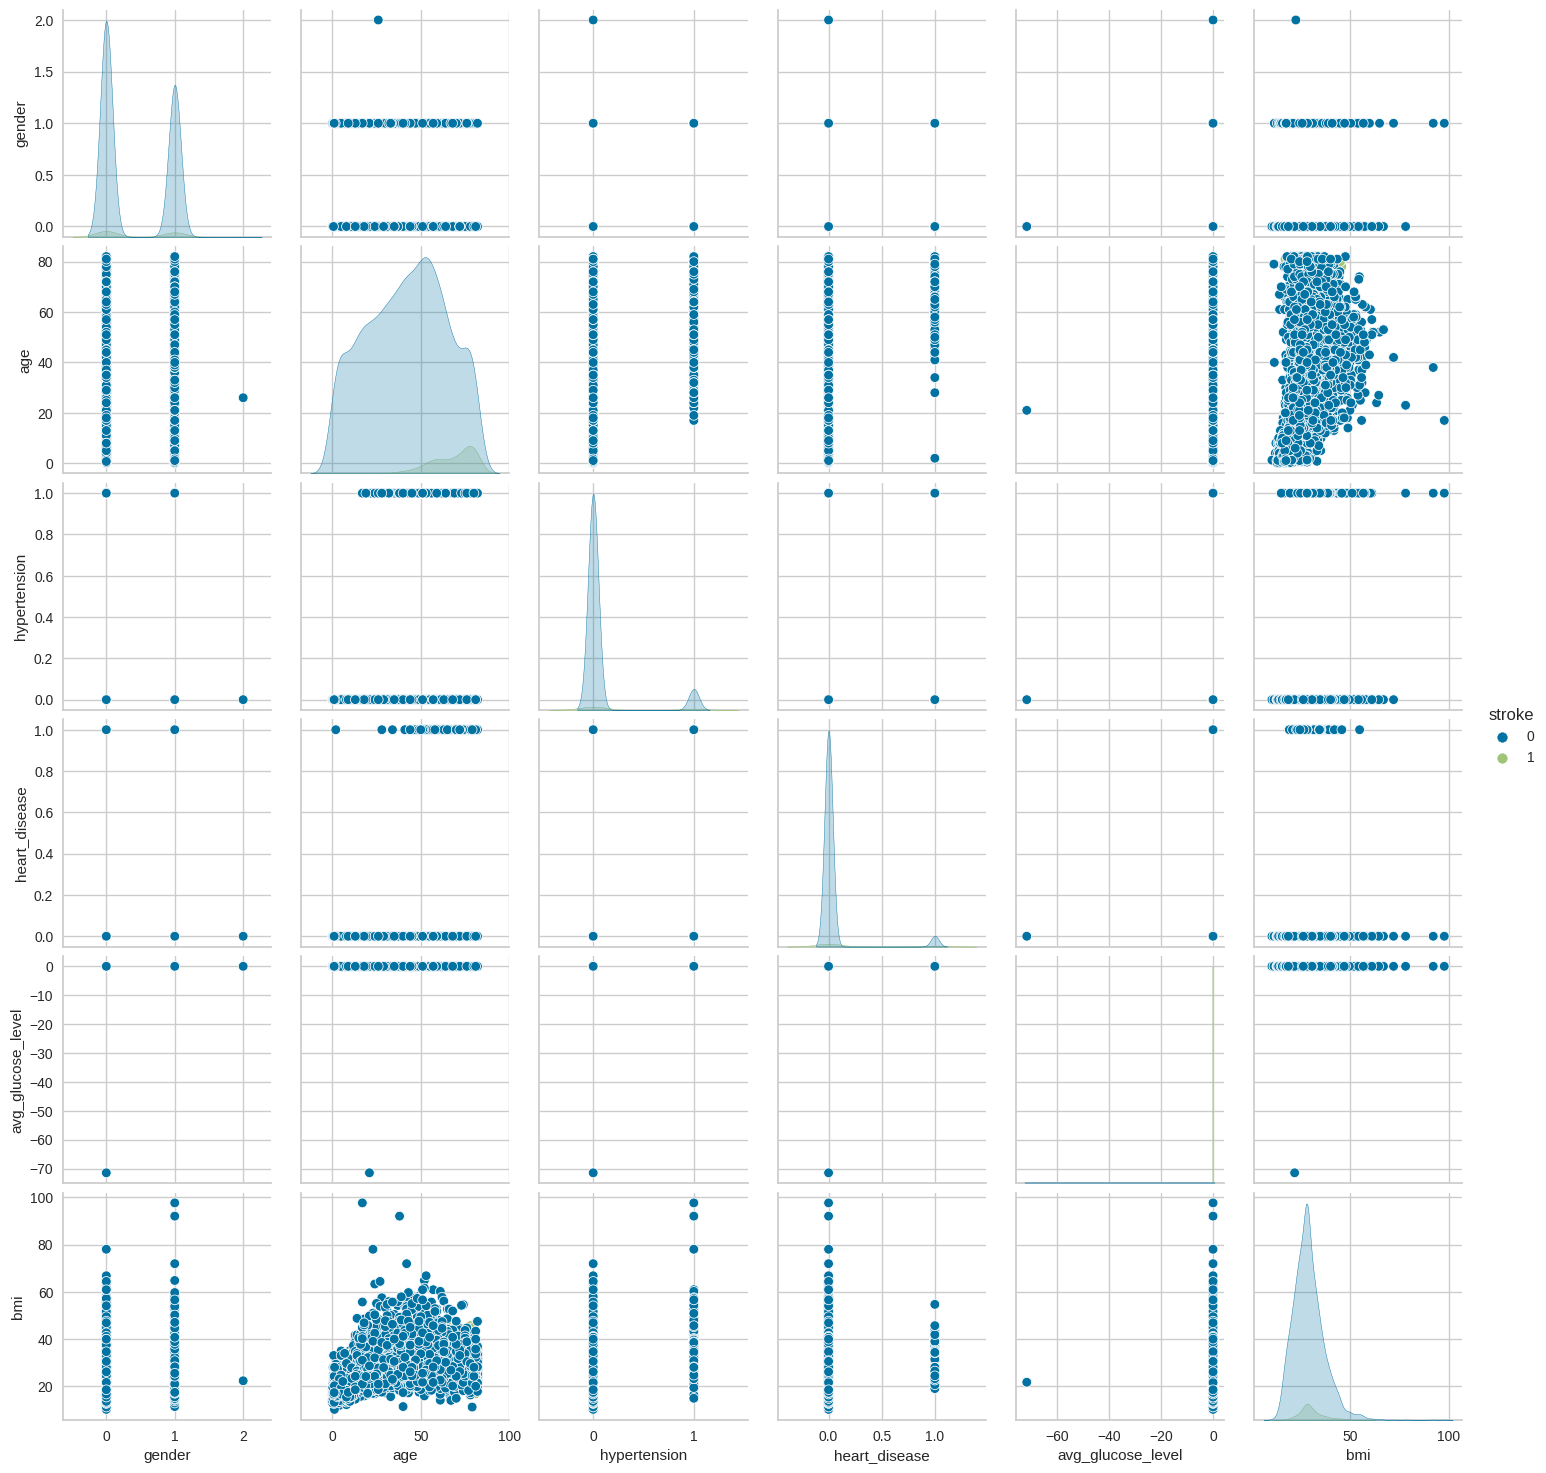

In [71]:
sns.pairplot(data,hue=target_column)

# measure the correlation between features

<Axes: >

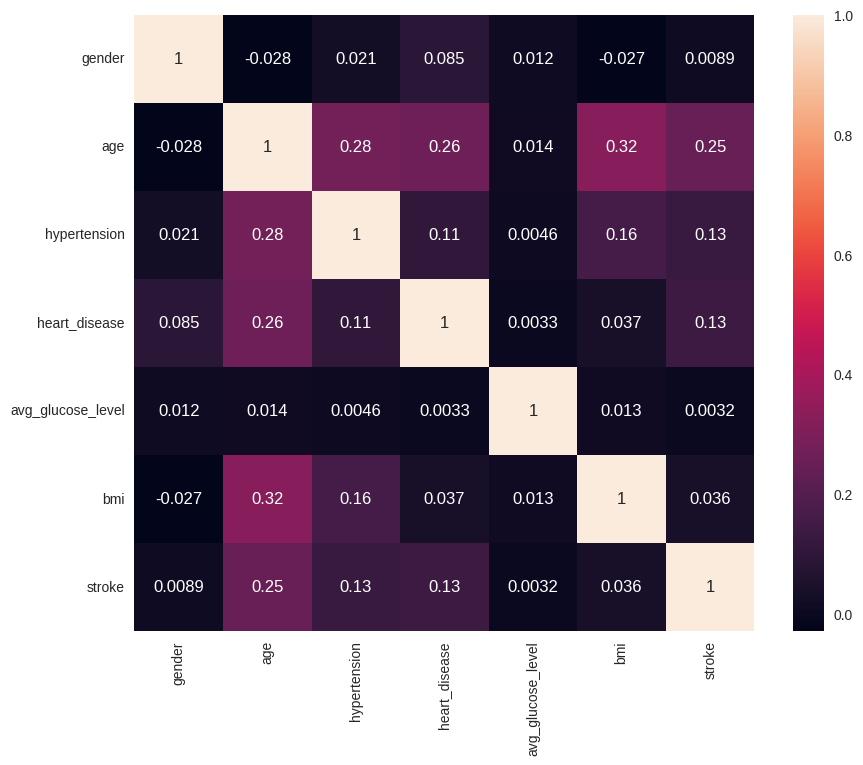

In [74]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True)

# to know task type ( regression or classification )

In [76]:
def discover_data_type(column_data):
    unique_values = set(column_data)

    if len(unique_values) == 2 and all(value in {0, 1} for value in unique_values):
        return "binary"
    elif all(isinstance(value, (int, float)) for value in column_data):
        return "numeric"
    else:
        return "discrete"

In [77]:
def determine_task_type(data_type):
    if data_type == "numeric":
        return "regression"
    else:
        return "classification"

In [80]:
def get_target_info(dataset):
    while True:
        try:
            target_column = input("Enter the name of the target column: ").strip()

            if target_column not in dataset.columns:
                raise ValueError(f"Column '{target_column}' not found in the dataset.")

            # اكتشاف نوع البيانات في العمود الهدف
            target_data_type = discover_data_type(dataset[target_column])

            # تحديد نوع المهمة استنادًا إلى نوع البيانات
            task_type = determine_task_type(target_data_type)

            confirm = input(f"Target column: '{target_column}',  Data type: '{target_data_type}', Task type: '{task_type}'. Confirm? (yes/no): ").strip().lower()
            if confirm == "yes":
                return target_column, target_data_type, task_type

        except ValueError as e:
            print(f"Error: {e}")
            print("Please try again.")

target_column, target_data_type, task_type =get_target_info(data)
task_type

Enter the name of the target column: stroke
Target column: 'stroke',  Data type: 'binary', Task type: 'classification'. Confirm? (yes/no): yes


'classification'

# Training and evaluating the model

In [83]:
from pycaret.regression import *
from pycaret.regression import RegressionExperiment
from pycaret.classification import *
from pycaret.classification import ClassificationExperiment

In [87]:
if task_type.lower() == 'regression':
  s = setup(data, target = target_column, session_id = 123)
  best = compare_models()
  best = s.compare_models()
  print(best)
else:
    print("Task does not match data type (regression).")
if task_type.lower() == 'classification':
        s = setup(data, target = target_column, session_id = 123)
        best=compare_models()
        best=s.compare_models()
        print(best)
else:
  print("Task does not match data type (classification).")

Task does not match data type (regression).


,Description,Value
0,Session id,123
1,Target,stroke
2,Target type,Binary
3,Original data shape,"(5110, 11)"
4,Transformed data shape,"(5110, 18)"
5,Transformed train set shape,"(3577, 18)"
6,Transformed test set shape,"(1533, 18)"
7,Ordinal features,2
8,Numeric features,6
9,Categorical features,4


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9514,0.8358,0.0000,0.0000,0.0000,0.0000,0.0000,0.5780
ridge,Ridge Classifier,0.9514,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1260
dummy,Dummy Classifier,0.9514,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1210
ada,Ada Boost Classifier,0.9494,0.8225,0.0114,0.2000,0.0216,0.0161,0.0382,0.3060
gbc,Gradient Boosting Classifier,0.9483,0.8284,0.0232,0.1250,0.0386,0.0299,0.0395,0.7000
rf,Random Forest Classifier,0.9472,0.7666,0.0346,0.2617,0.0592,0.0471,0.0748,0.7280
knn,K Neighbors Classifier,0.9466,0.6374,0.0229,0.0950,0.0368,0.0257,0.0307,0.2000
lightgbm,Light Gradient Boosting Machine,0.9444,0.8084,0.0464,0.2476,0.0739,0.0571,0.0805,0.6300
lda,Linear Discriminant Analysis,0.9441,0.8314,0.0510,0.1750,0.0783,0.0608,0.0726,0.2810
xgboost,Extreme Gradient Boosting,0.9405,0.7896,0.0578,0.1856,0.0851,0.0626,0.0753,0.4350


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9514,0.8358,0.0000,0.0000,0.0000,0.0000,0.0000,0.2420
ridge,Ridge Classifier,0.9514,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1240
dummy,Dummy Classifier,0.9514,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1240
ada,Ada Boost Classifier,0.9494,0.8225,0.0114,0.2000,0.0216,0.0161,0.0382,0.4600
gbc,Gradient Boosting Classifier,0.9483,0.8284,0.0232,0.1250,0.0386,0.0299,0.0395,0.4020
rf,Random Forest Classifier,0.9472,0.7666,0.0346,0.2617,0.0592,0.0471,0.0748,0.6570
knn,K Neighbors Classifier,0.9466,0.6374,0.0229,0.0950,0.0368,0.0257,0.0307,0.1470
lightgbm,Light Gradient Boosting Machine,0.9444,0.8084,0.0464,0.2476,0.0739,0.0571,0.0805,0.3970
lda,Linear Discriminant Analysis,0.9441,0.8314,0.0510,0.1750,0.0783,0.0608,0.0726,0.1320
xgboost,Extreme Gradient Boosting,0.9405,0.7896,0.0578,0.1856,0.0851,0.0626,0.0753,0.4770


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [89]:
print('evaluate best_model')
evaluate_model(best)

evaluate best_model


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…